Import libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate

Load the data set

In [35]:
reader = Reader(line_format='user item rating', sep=",", skip_lines=1)
data = Dataset.load_from_file("./ratings_small.csv", reader=reader)

In [36]:
def getAverage(ret, rmse, mae):
    avg = 0
    for x in ret['test_rmse']:
        avg += x
    avg = avg / len(ret['test_rmse'])
    rmse.append(avg)
    
    avg = 0
    for x in ret['test_mae']:
        avg += x
    avg = avg / len(ret['test_mae'])
    mae.append(avg)
    
    return
   
UBrm = []
UBma = []
IBrm = []
IBma = []

In [37]:
algoPMF = SVD(biased=False)
ret = cross_validate(algoPMF, data, measures=["RMSE", "MAE"], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0194  1.0075  1.0069  0.9995  1.0061  1.0079  0.0064  
MAE (testset)     0.7866  0.7775  0.7778  0.7729  0.7769  0.7783  0.0045  
Fit time          0.70    0.68    0.73    0.68    0.75    0.71    0.02    
Test time         0.17    0.07    0.07    0.07    0.07    0.09    0.04    


In [38]:
algoUB = KNNBasic(user_based=True)
ret = cross_validate(algoUB, data, measures=["RMSE", "MAE"], verbose=True)
getAverage(ret,UBrm,UBma)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9644  0.9643  0.9749  0.9654  0.9716  0.9681  0.0043  
MAE (testset)     0.7392  0.7409  0.7487  0.7468  0.7481  0.7447  0.0039  
Fit time          0.08    0.08    0.10    0.10    0.09    0.09    0.01    
Test time         0.85    0.79    0.88    0.77    0.76    0.81    0.05    


In [39]:
algoIB = KNNBasic(user_based=False)
ret = cross_validate(algoIB, data, measures=["RMSE", "MAE"], verbose=True)
getAverage(ret,IBrm,IBma)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9696  0.9670  0.9653  0.9763  0.9616  0.9680  0.0049  
MAE (testset)     0.7498  0.7413  0.7437  0.7468  0.7398  0.7443  0.0037  
Fit time          0.07    0.08    0.08    0.08    0.08    0.08    0.00    
Test time         0.74    0.79    0.75    0.73    0.85    0.77    0.04    


In [40]:
algoUBcosine = KNNBasic(user_based=True,name="cosine")
algoUBpearson = KNNBasic(user_based=True,name="pearson")
ret = cross_validate(algoUBcosine, data, measures=["RMSE", "MAE"], verbose=True)
getAverage(ret,UBrm,UBma)
ret = cross_validate(algoUBpearson, data, measures=["RMSE", "MAE"], verbose=True)
getAverage(ret,UBrm,UBma)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9572  0.9615  0.9699  0.9731  0.9785  0.9680  0.0077  
MAE (testset)     0.7337  0.7400  0.7473  0.7477  0.7522  0.7442  0.0065  
Fit time          0.08    0.08    0.08    0.09    0.08    0.08    0.00    
Test time         0.75    0.86    0.78    0.76    0.74    0.78    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [41]:
algoIBcosine = KNNBasic(user_based=False,name="cosine")
algoIBpearson = KNNBasic(user_based=False,name="pearson")
ret = cross_validate(algoIBcosine, data, measures=["RMSE", "MAE"], verbose=True)
getAverage(ret,IBrm,IBma)
ret = cross_validate(algoIBpearson, data, measures=["RMSE", "MAE"], verbose=True)
getAverage(ret,IBrm,IBma)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9731  0.9630  0.9668  0.9646  0.9705  0.9676  0.0037  
MAE (testset)     0.7501  0.7403  0.7431  0.7405  0.7441  0.7436  0.0036  
Fit time          0.07    0.09    0.08    0.07    0.07    0.08    0.01    
Test time         0.74    0.83    0.73    0.81    0.73    0.77    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [58]:
print(UBma)

[0.7447401985049888, 0.7441813657031543, 0.7441495223081807]


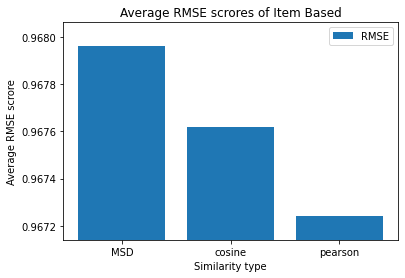

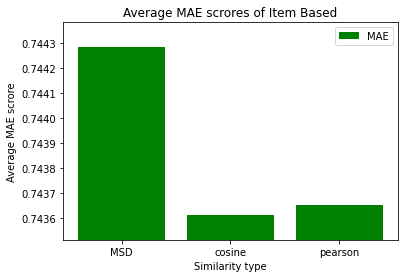

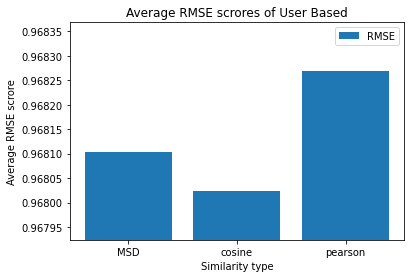

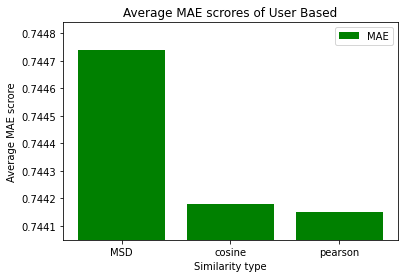

In [73]:
X = ['MSD','cosine', 'pearson']

plt.bar(X, IBrm, label = 'RMSE')
plt.axis(ymin = min(IBrm)-.0001,ymax = max(IBrm) + .0001)
plt.legend()
plt.xlabel('Similarity type')
plt.ylabel('Average RMSE scrore')
plt.title('Average RMSE scrores of Item Based')
plt.show()

plt.bar(X, IBma, label = 'MAE', color = 'g')
plt.axis(ymin = min(IBma)-.0001,ymax = max(IBma) + .0001)
plt.xlabel('Similarity type')
plt.ylabel('Average MAE scrore')
plt.title('Average MAE scrores of Item Based')
plt.legend()
plt.show()

plt.bar(X, UBrm, label = 'RMSE')
plt.axis(ymin = min(UBrm)-.0001,ymax = max(UBrm) + .0001)
plt.legend()
plt.xlabel('Similarity type')
plt.ylabel('Average RMSE scrore')
plt.title('Average RMSE scrores of User Based')
plt.show()

plt.bar(X, UBma, label = 'MAE', color = 'g')
plt.axis(ymin = min(UBma)-.0001,ymax = max(UBma) + .0001)
plt.xlabel('Similarity type')
plt.ylabel('Average MAE scrore')
plt.title('Average MAE scrores of User Based')
plt.legend()
plt.show()

In [ ]:
algoUB = KNNBasic(user_based=True)
algoIB = KNNBasic(user_based=False)

ubm = []
ubr = []
ibm = []
ibr = []

for x in range(1,41):
    algoUB = KNNBasic(user_based=True, k=x)
    ret = cross_validate(algoUB, data, measures=["RMSE", "MAE"], verbose=True)
    getAverage(ret,ubr,ubm)
    algoIB = KNNBasic(user_based=False, k=x)
    ret = cross_validate(algoIB, data, measures=["RMSE", "MAE"], verbose=True)
    getAverage(ret,ibr,ibm)
    

    

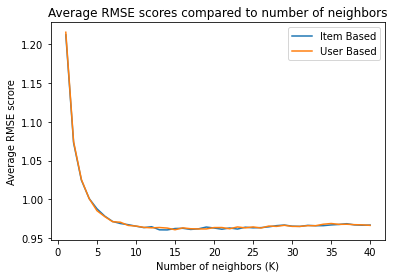

In [78]:
X = list(range(1,41))

plt.plot(X, ibr, label = 'Item Based')
plt.plot(X,ubr,label = 'User Based')
plt.legend()
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Average RMSE scrore')
plt.title('Average RMSE scores compared to number of neighbors')
plt.show()


In [80]:
umin = np.argmin(ubr) + 1
imin = np.argmin(ibr) + 1
print('Best number of neighbors for user based:',umin)
print('Best number of neighbors for item based:',imin)

Best number of neighbors for user based: 15
Best number of neighbors for item based: 14
